<a href="https://colab.research.google.com/github/stefdaems/colab/blob/master/first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.12.0-rc2


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
len(train_labels)

60000

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_labels)

10000

In [29]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

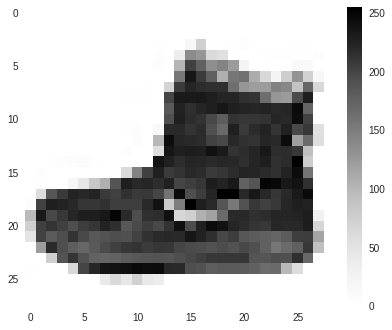

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255
test_images = test_images / 255

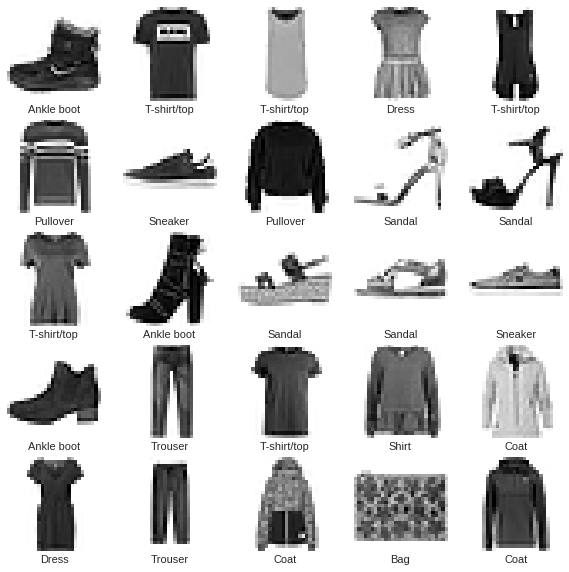

In [32]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])



In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.4983 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3760 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3358 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3115 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2941 - acc: 0.8905


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test Accuracy: 0.872


In [0]:
predictions = model.predict(test_images)

In [38]:
predictions[0]

array([2.2356251e-06, 3.6189313e-08, 9.8257431e-08, 3.1609041e-08,
       3.6944986e-08, 2.1962427e-02, 6.5596537e-06, 1.1331488e-02,
       2.1226935e-04, 9.6648484e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

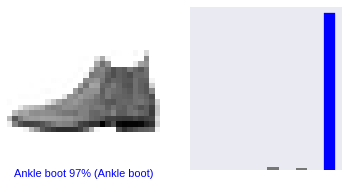

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

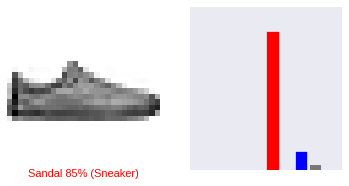

In [50]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

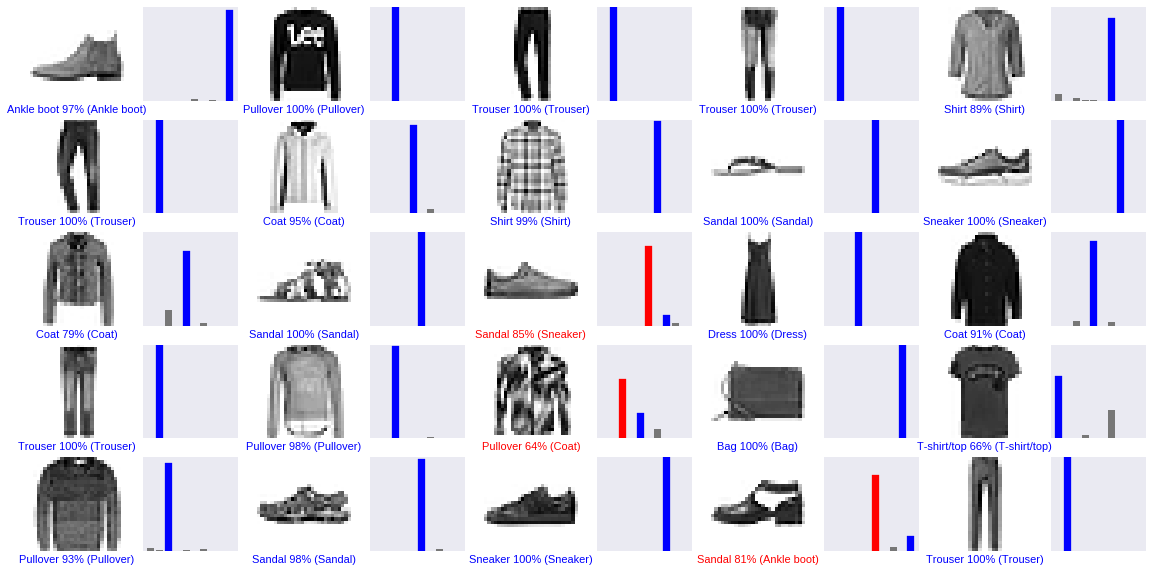

In [52]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [53]:
img = test_images[0]
print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.2356205e-06 3.6189313e-08 9.8257431e-08 3.1608980e-08 3.6944776e-08
  2.1962423e-02 6.5596414e-06 1.1331483e-02 2.1226895e-04 9.6648484e-01]]


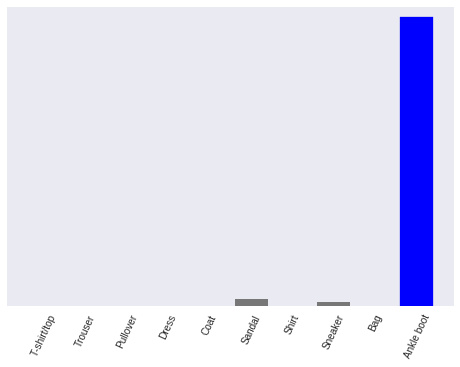

In [58]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=65)

In [59]:
np.argmax(predictions_single[0])

9